In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Subset, ConcatDataset, TensorDataset
import torchvision.transforms as transforms
import torchvision

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Transform image inputs to tensor and normalize input in each of the 3 channels that have means 0.5 and std 0.5
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [01:06<00:00, 2583163.13it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.255
[1,  4000] loss: 1.898
[1,  6000] loss: 1.680
[1,  8000] loss: 1.596
[1, 10000] loss: 1.502
[1, 12000] loss: 1.479
[2,  2000] loss: 1.432
[2,  4000] loss: 1.375
[2,  6000] loss: 1.341
[2,  8000] loss: 1.326
[2, 10000] loss: 1.311
[2, 12000] loss: 1.276
Finished Training


TypeError: Invalid shape (3, 36, 138) for image data

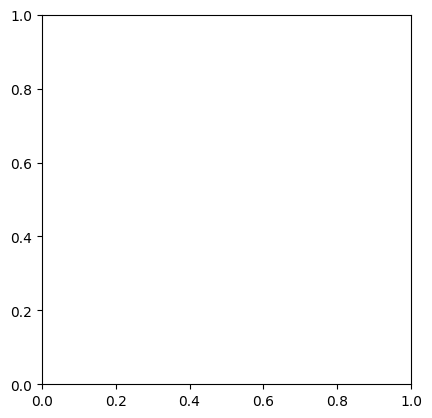

In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
plt.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [14]:
outputs = net(images)

In [16]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


MNIST CNN

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('classifier_data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 11508340.88it/s]


Extracting classifier_data/MNIST/raw/train-images-idx3-ubyte.gz to classifier_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22629496.32it/s]


Extracting classifier_data/MNIST/raw/train-labels-idx1-ubyte.gz to classifier_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 7120997.49it/s]


Extracting classifier_data/MNIST/raw/t10k-images-idx3-ubyte.gz to classifier_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16268598.44it/s]

Extracting classifier_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to classifier_data/MNIST/raw



In [4]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_dataset.transform=transform
test_dataset.transform=transform

m=len(train_dataset)
train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])


In [5]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

print("Batches in Train Loader: {}".format(len(train_loader)))
print("Batches in Valid Loader: {}".format(len(valid_loader)))
print("Batches in Test Loader: {}".format(len(test_loader)))

print("Examples in Train Loader: {}".format(len(train_loader.sampler)))
print("Examples in Valid Loader: {}".format(len(valid_loader.sampler)))


Batches in Train Loader: 375
Batches in Valid Loader: 94
Batches in Test Loader: 79
Examples in Train Loader: 48000
Examples in Valid Loader: 12000


In [14]:
class ConvNet(nn.Module): 

    def __init__(self, h1=96): 
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.drop1 = nn.Dropout2d(p=0.5)

        self.fc1 = nn.Linear(32*7*7, h1)
        self.drop2 = nn.Dropout2d(p=0.1)
        self.fc2 = nn.Linear(h1, 10)


    def forward(self, x): 
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2))
        x = self.drop1(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.drop2(x)
        return self.fc2(x)


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)
model = ConvNet()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion= nn.CrossEntropyLoss()

In [16]:
history={'train_loss':[],'valid_loss':[],'train_acc':[],'valid_acc':[]}
num_epochs=10

for epoch in range(num_epochs):
    train_loss,train_correct=0.0,0
    model.train()
    for images, labels in train_loader:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()    
    
    valid_loss, val_correct = 0.0, 0
    model.eval()
    for images, labels in valid_loader:

        images,labels = images.to(device),labels.to(device)
        output = model(images)
        loss=criterion(output,labels)
        valid_loss+=loss.item()*images.size(0)
        scores, predictions = torch.max(output.data,1)
        val_correct+=(predictions == labels).sum().item()

    train_loss = train_loss / len(train_loader.sampler)
    train_acc = train_correct / len(train_loader.sampler)*100
    valid_loss = valid_loss / len(valid_loader.sampler)
    valid_acc = val_correct / len(valid_loader.sampler) * 100

    print("Epoch:{}/{} \t AVERAGE TL:{:.4f} AVERAGE VL:{:.4f} \t AVERAGE TA:{:.2f} %  AVERAGE VA:{:.2f} %".format(epoch + 1, num_epochs,
                                                                                         train_loss,
                                                                                         valid_loss,
                                                                                         train_acc,
                                                                                        valid_acc))
    history['train_loss'].append(train_loss)    
    history['valid_loss'].append(valid_loss)  
    history['train_acc'].append(train_acc)  
    history['valid_acc'].append(valid_acc)  

/Users/rishubhanda/.virtualenvs/tutorials/lib/python3.10/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch:1/10 	 AVERAGE TL:0.2825 AVERAGE VL:0.0594 	 AVERAGE TA:91.26 %  AVERAGE VA:98.10 %
Epoch:2/10 	 AVERAGE TL:0.0909 AVERAGE VL:0.0439 	 AVERAGE TA:97.25 %  AVERAGE VA:98.61 %
Epoch:3/10 	 AVERAGE TL:0.0681 AVERAGE VL:0.0339 	 AVERAGE TA:97.95 %  AVERAGE VA:99.04 %
Epoch:4/10 	 AVERAGE TL:0.0547 AVERAGE VL:0.0340 	 AVERAGE TA:98.30 %  AVERAGE VA:99.12 %
Epoch:5/10 	 AVERAGE TL:0.0497 AVERAGE VL:0.0341 	 AVERAGE TA:98.51 %  AVERAGE VA:98.98 %
Epoch:6/10 	 AVERAGE TL:0.0414 AVERAGE VL:0.0291 	 AVERAGE TA:98.66 %  AVERAGE VA:99.16 %
Epoch:7/10 	 AVERAGE TL:0.0409 AVERAGE VL:0.0340 	 AVERAGE TA:98.66 %  AVERAGE VA:98.90 %
Epoch:8/10 	 AVERAGE TL:0.0372 AVERAGE VL:0.0268 	 AVERAGE TA:98.79 %  AVERAGE VA:99.22 %
Epoch:9/10 	 AVERAGE TL:0.0354 AVERAGE VL:0.0259 	 AVERAGE TA:98.84 %  AVERAGE VA:99.29 %
Epoch:10/10 	 AVERAGE TL:0.0318 AVERAGE VL:0.0259 	 AVERAGE TA:98.96 %  AVERAGE VA:99.21 %


In [17]:
correct = 0
total = 0
test_loss = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs,labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader.sampler)

print('Accuracy of the network on the test images: {:.2f} %%'.format(100 * correct / total))
print('Loss of the network on the test images: {:.4f}'.format(test_loss))

Accuracy of the network on the test images: 99.08 %%
Loss of the network on the test images: 0.0292


Total convolutional layers: 2
CONV: Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([16, 1, 5, 5])
CONV: Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([32, 16, 5, 5])


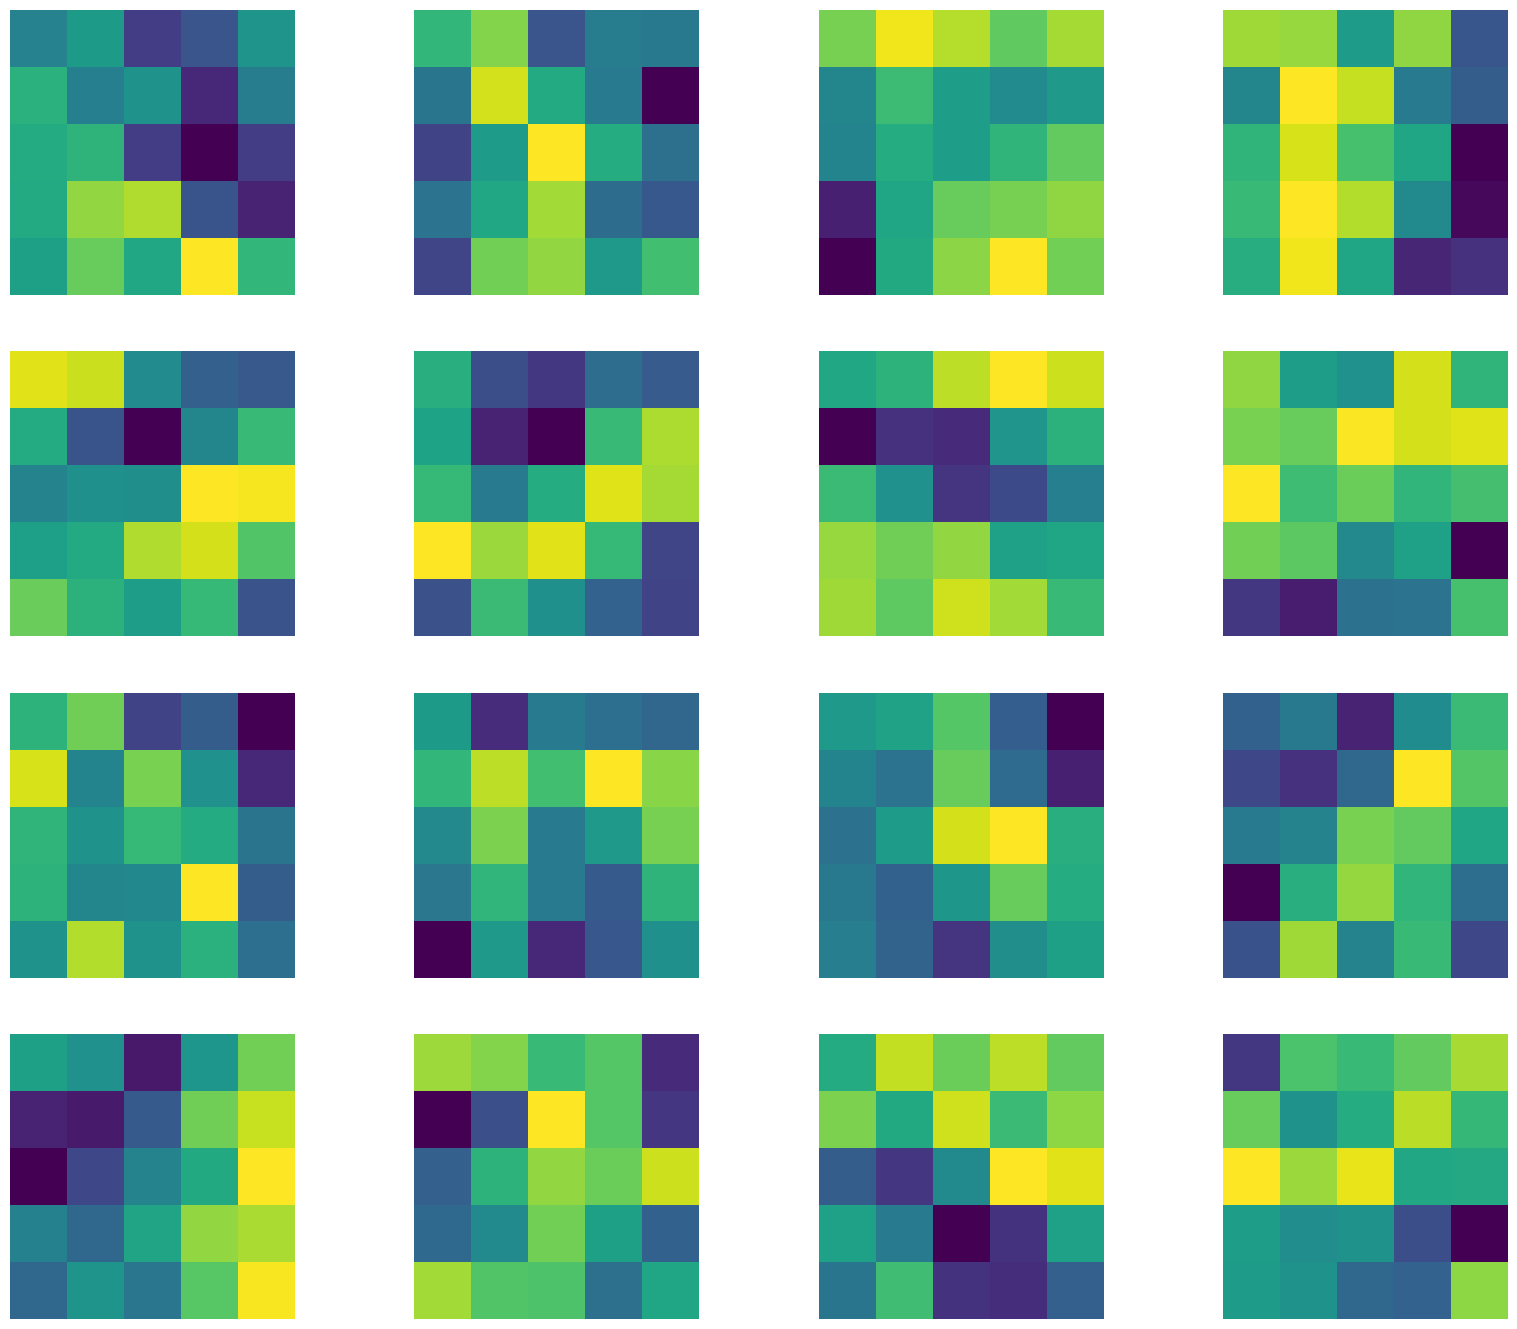

In [23]:
model_weights = [] 
conv_layers = [] 
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(4, 4, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.savefig('filter1.png')
plt.show()

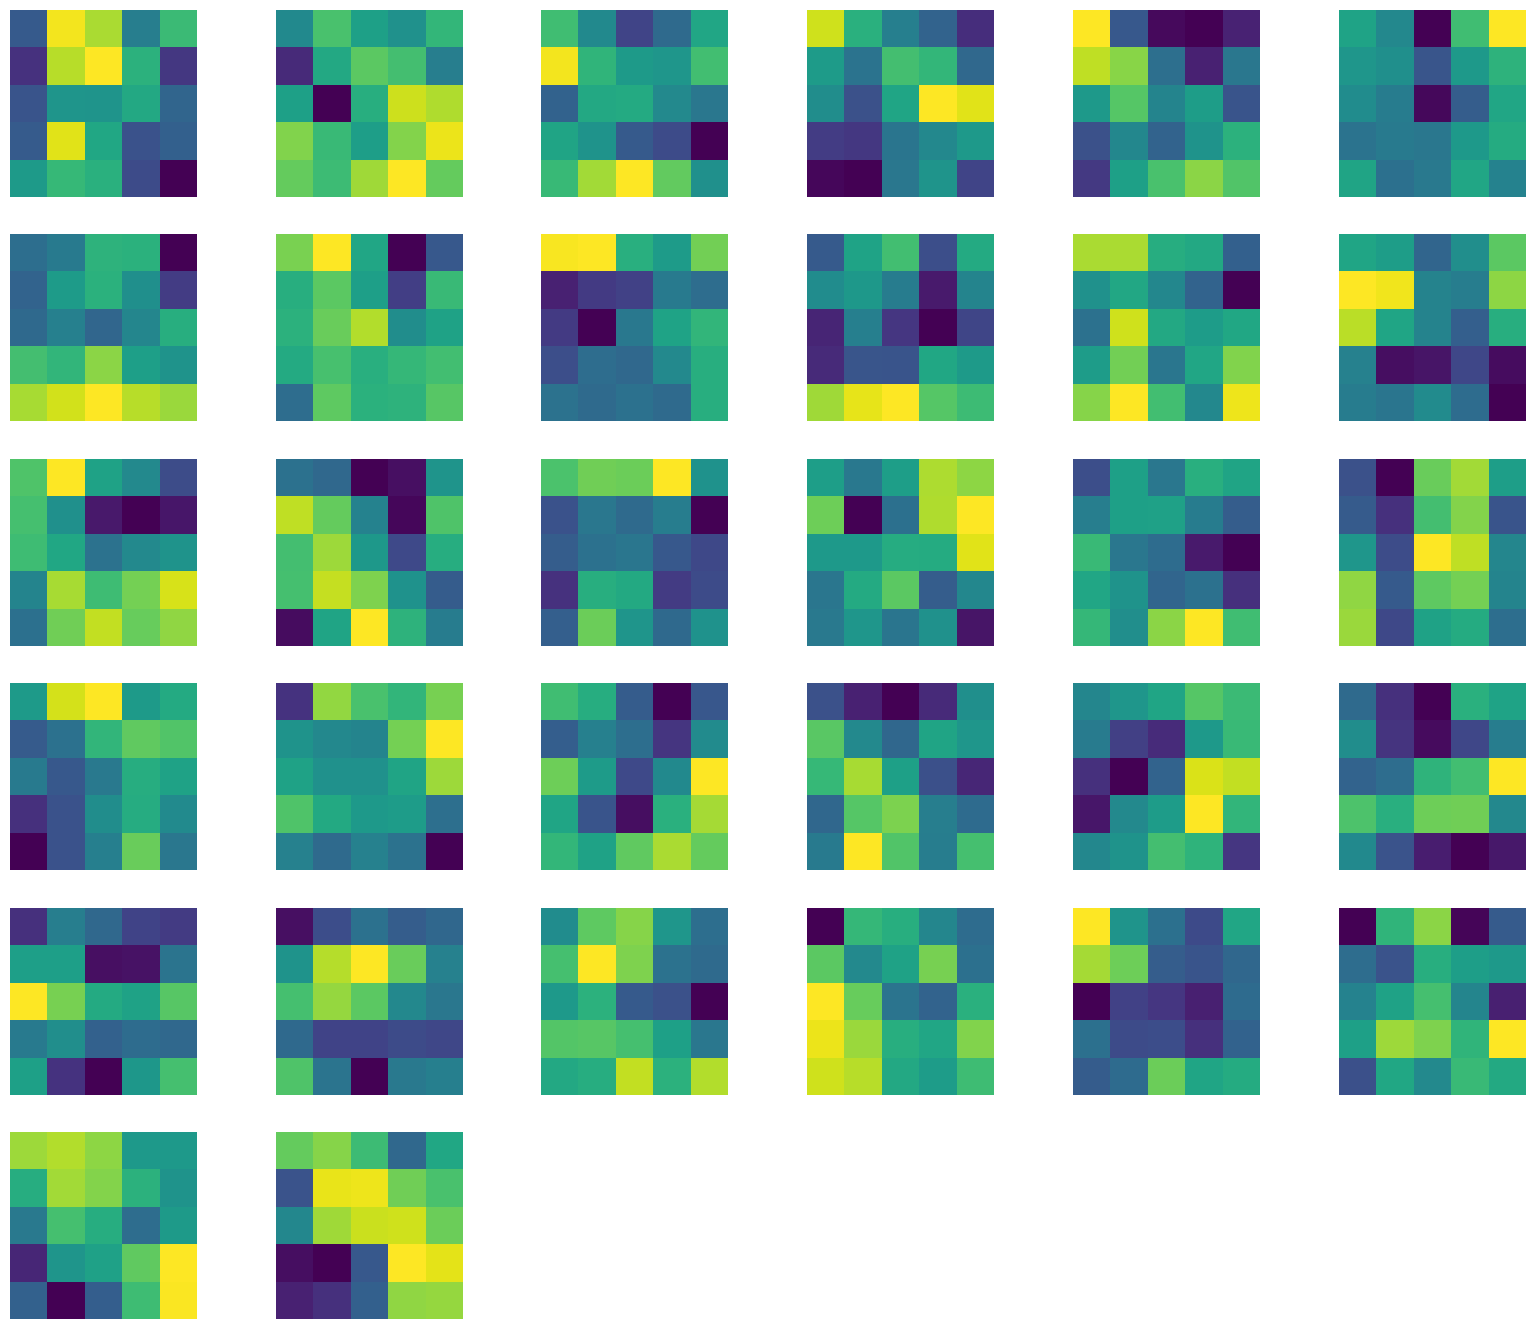

In [24]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[1]):
    plt.subplot(6, 6, i+1) # (8, 8) because in conv0 we have 5x5 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.savefig('filter2.png')
plt.show()

/Users/rishubhanda/.virtualenvs/tutorials/lib/python3.10/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


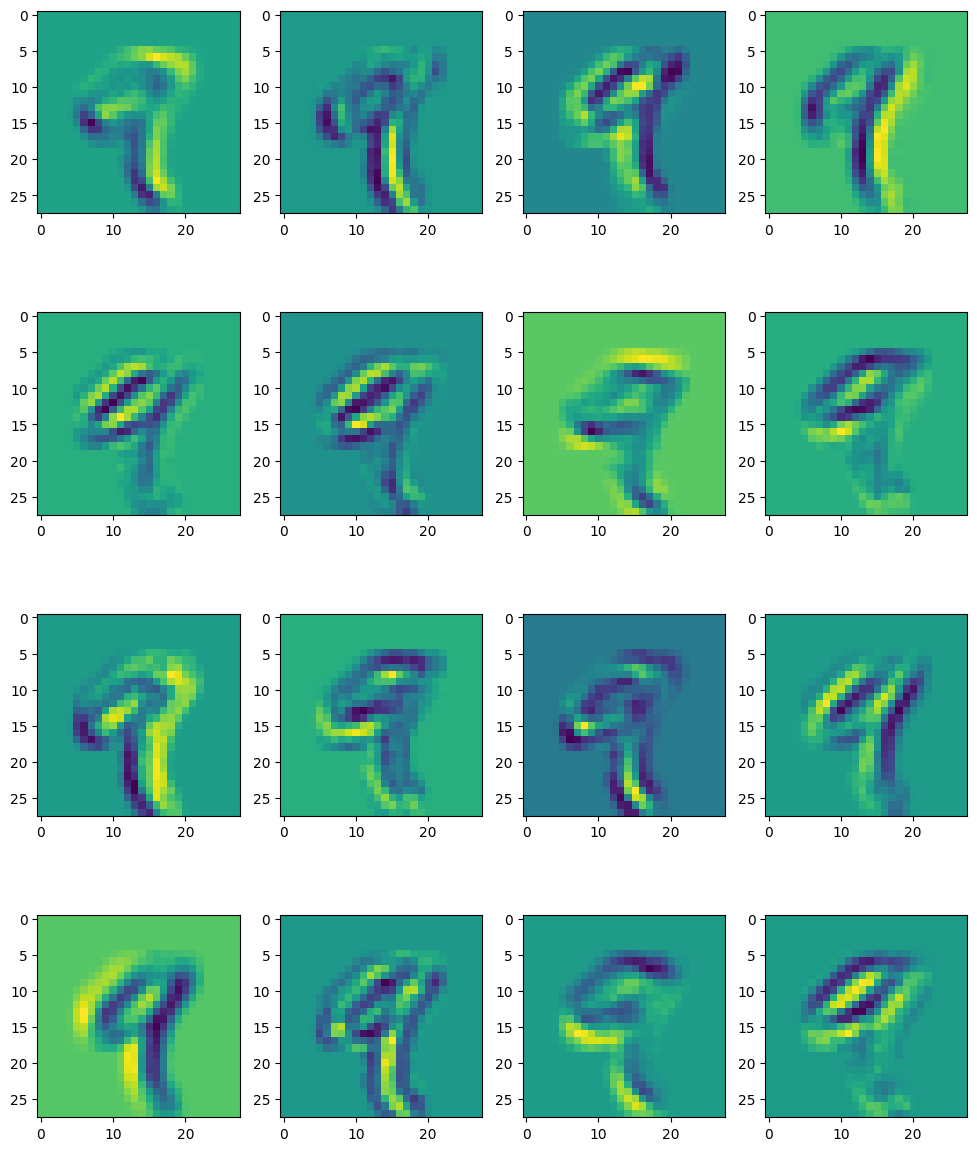

In [25]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
data, _ = train_dataset[4]
data=data.to(device)
data.unsqueeze_(0)
output = model(data)

k=0
act = activation['conv1'].squeeze()
fig,ax = plt.subplots(4,4,figsize=(12, 15))

for i in range(act.size(0)//4):
        for j in range(act.size(0)//4):
           ax[i,j].imshow(act[k].detach().cpu().numpy())
           k+=1    
           plt.savefig('fm1.png') 

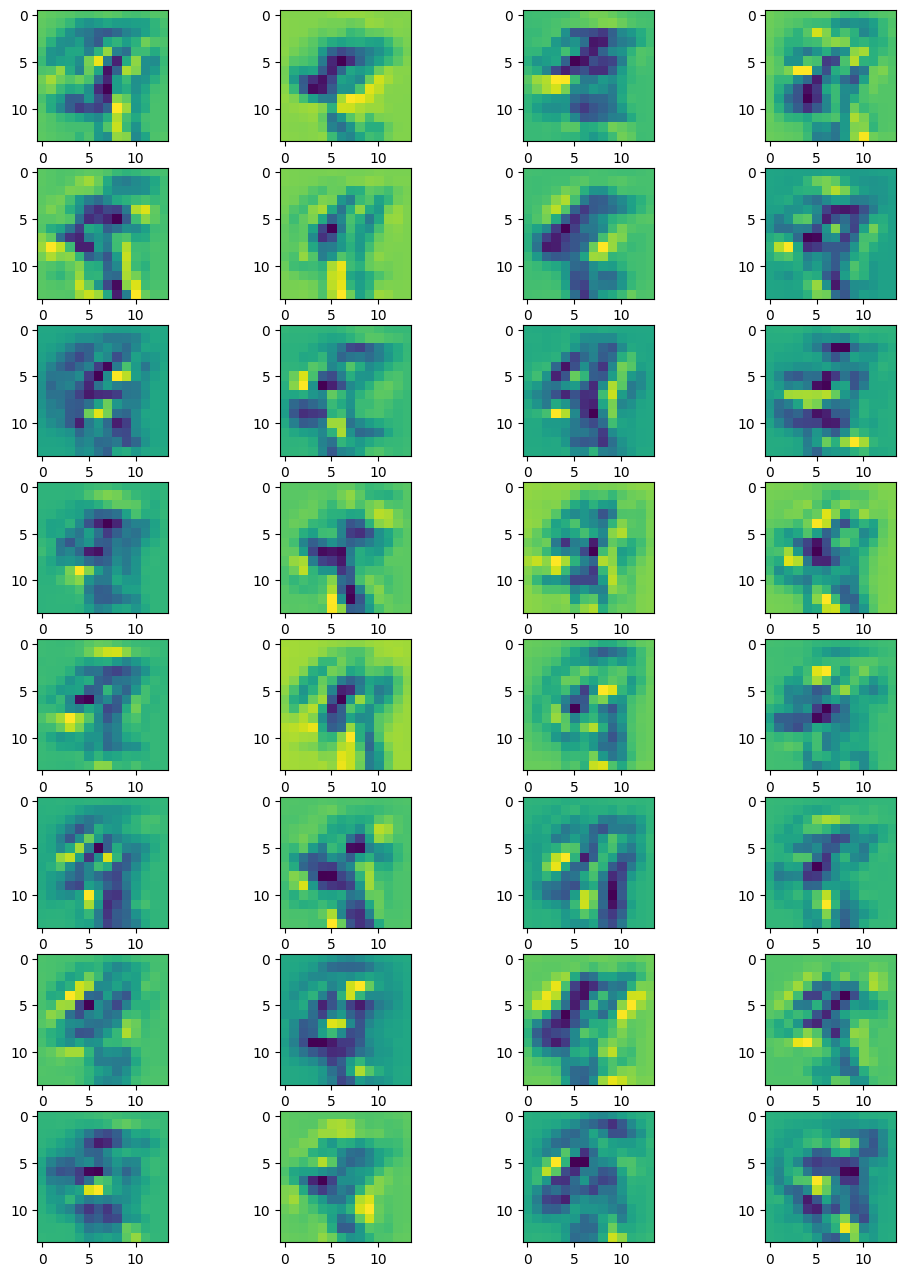

In [26]:
model.conv2.register_forward_hook(get_activation('conv2'))
data, _ = train_dataset[4]
data=data.to(device)
data.unsqueeze_(0)
output = model(data)
act = activation['conv2'].squeeze()

fig, axarr = plt.subplots(act.size(0)//4,4,figsize=(12, 16))
k=0
for i in range(act.size(0)//4):
        for j in range(4):
          axarr[i,j].imshow(act[k].detach().cpu().numpy())
          k+=1  
          plt.savefig('fm2.png') 